# Model's predictions comparison

**NOTEBOOK GOAL**: Compare predictions of models

Compared predictions:

- **1_RFR** - Notebook 5.3 Random forrest
- **2_XGB** - Notebook 6.4 XGBoost
- **3_AVG** - Notebook 7.2 AVG Month ensembles

In [1]:
from import_man import *
from BIP import apply_BIP_submission_structure, apply_BIP_submission_structure_keep_actual

**NOTE** If you cannot load the followig datasets, please go to the corresponding notebook and run it to generate the related dataset file. 

In [2]:
test_53_RFR_on_prep = pd.read_csv('./dataset/test_m12_53_RFR_on_prep.csv')

In [3]:
test_64_Model_XGBoost = pd.read_csv('./dataset/test_m12_64_Model_XGBoost_final.csv')

In [4]:
test_72_AVG_Month_Ensemble = pd.read_csv('./dataset/test_m12_72_AVG_Month_Ensemble.csv')

In [5]:
df1 = test_53_RFR_on_prep
df2 = test_64_Model_XGBoost
df3 = test_72_AVG_Month_Ensemble

In [6]:
# let's use those that will be submitted and in that order (rows)
cp_with_actual = apply_BIP_submission_structure_keep_actual(df1)


model_prefix = ['RFR', 'XGB', 'AVG']
dfs_list = [df1, df2, df3]

for i in range(0,len(dfs_list)):
    dfs_list[i] = apply_BIP_submission_structure(dfs_list[i])

### Data preparation for visualization

In [7]:
# assert all dataframe have the same number of rows

for i in range(0, len(dfs_list) - 1):
    # assert the dataframes number of rows
    df0 = dfs_list[i]
    df1 = dfs_list[i+1]
    print('len0:      ', df0.shape[0])
    print('len1:      ', df1.shape[0])
    print('Stores0:   ', len(df0.StoreID.unique()))
    print('Stores1:   ', len(df1.StoreID.unique()))
    print('D_Months0: ', len(df1.D_Month.unique()))
    print('D_Months1: ', len(df1.D_Month.unique()))
    
    assert(df0.shape[0] == df1.shape[0])
    assert(len(df0.StoreID.unique()) == len(df1.StoreID.unique()))
    assert(len(df0.D_Month.unique()) == len(df1.D_Month.unique()))
    assert(len(df0.D_Month.unique()) == 2)

    
#print(dfs_list[0].shape)
rows = dfs_list[0].shape[0]

# create a tuple with two new data frame to plot
               
df_plots = [
    pd.DataFrame(index=range(0, int(rows/2))),  # first month 
    pd.DataFrame(index=range(0, int(rows/2)))   # second month
]


# unpack dataframes to be tested
for df_idx, df in enumerate(dfs_list):
    print('---- df for model: ' + model_prefix[df_idx])
    
    months = df['D_Month'].unique()
    print('months: ', months)
    
    for m_idx in range(0, 2):
        tmp = df[df.D_Month == months[m_idx]]
        tmp.reset_index(drop=True, inplace=True)
        lbl = 'NumberOfSales__m' + str(months[m_idx]) + '__MDL_' + model_prefix[df_idx]
        df_plots[m_idx][lbl] = tmp['NumberOfSales']
        
        tmp = cp_with_actual[cp_with_actual.D_Month == months[m_idx]]
        tmp.reset_index(drop=True, inplace=True)
        df_plots[m_idx]['NumberOfSales'] = tmp['NumberOfSales']

        
for idx in range(0, 2):
    df_plots[idx].index += 1000
    
    # let's reorder columns in order to have NumberOfSales as first one
    cols = list(df_plots[idx].columns)
    cols.remove('NumberOfSales')
    df_plots[idx] = df_plots[idx][['NumberOfSales'] + cols]

    print('df_plots[' + str(idx) + '].shape', df_plots[idx].shape)

len0:       1498
len1:       1498
Stores0:    749
Stores1:    749
D_Months0:  2
D_Months1:  2
len0:       1498
len1:       1498
Stores0:    749
Stores1:    749
D_Months0:  2
D_Months1:  2
---- df for model: RFR
months:  ['1' '2']
---- df for model: XGB
months:  ['1' '2']
---- df for model: AVG
months:  ['1' '2']
df_plots[0].shape (749, 4)
df_plots[1].shape (749, 4)


In [8]:
# month 0
df_plots[0].head()

,NumberOfSales,NumberOfSales__m1__MDL_RFR,NumberOfSales__m1__MDL_XGB,NumberOfSales__m1__MDL_AVG
1000,182917,201451.830901,195912.7838,192640.24
1001,95745,83185.502132,89660.7154,68836.56
1002,121995,134334.706754,129124.9452,119249.52
1003,139927,147240.809887,140085.2154,131549.60
1004,90941,96220.755514,89024.6876,87098.00


In [9]:
# month 1
df_plots[1].head()

,NumberOfSales,NumberOfSales__m2__MDL_RFR,NumberOfSales__m2__MDL_XGB,NumberOfSales__m2__MDL_AVG
1000,166161,184721.490504,172333.8114,175253.0
1001,88423,72102.648063,79868.3372,64795.0
1002,115538,123983.669665,119127.6920,116822.0
1003,132133,133452.016708,126948.9163,128683.0
1004,92571,99545.510005,94745.6978,92033.0


In [10]:
def plot_comparison_bar_plots(df_plots, month=0, n=20, first=0, last=None):
    '''
    Plot a number of bar plots of the desired month of predictions.
    
    Example:  
        
        plot_comparison_bar_plots(df_plots, month=1, n=20, first=10, last=12)
    
    Will print the month 1 of predictions for all the models.
    It will split the total number of stores in 20 batches and it will print
    the bar plots diagrams of the 10th, 11th, 12th.


    :param list df_plots: The df plots list created before in the nobeook.
    :param int month: The index of the month to print. Allowed values: 0, 1
    :param int n: The quantity of batches into which split the dataframe. One batch --> One diagram
    :param int first: The first batch form which start to plot
    :param int last: The last batch to print
    '''
    if not last:
        last = n

    # n: how many plots to create?
    # first: first plot to be printed
    # last: last plot to be printed 
    
    assert(first < n and first < last)

    n_stores = df_plots[0].shape[0]
    step = n_stores // n

    idx = 1000
    for i in range(0, n + 1):
        # exit condition
        if i > last:
            break

        if i >= first:
            slc_to_plt = df_plots[month][(df_plots[month].index >= idx) & (df_plots[month].index < idx + step)]
            slc_to_plt.plot(kind='bar', figsize=(16,9))
            
        idx += step


## FIRST MONTH: Comparison bar plots of models' predictions   

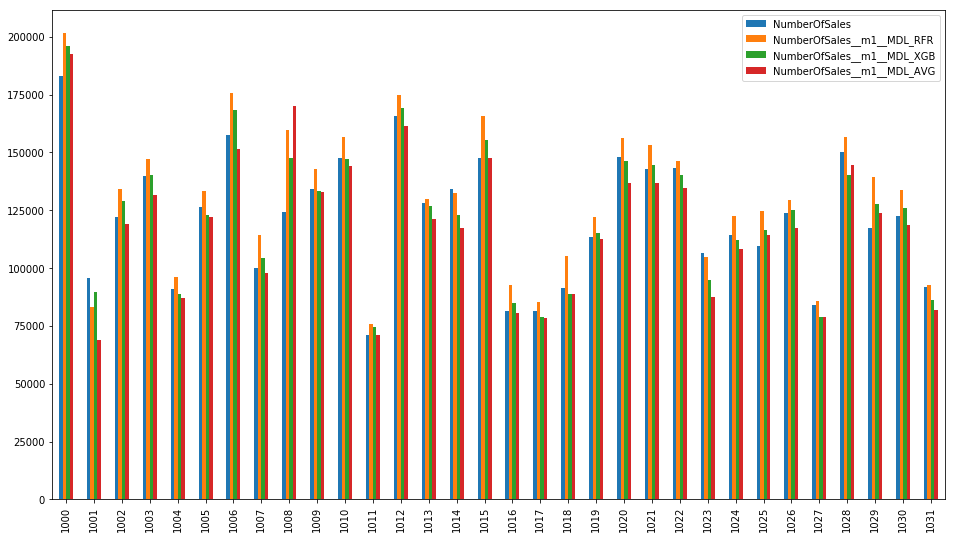

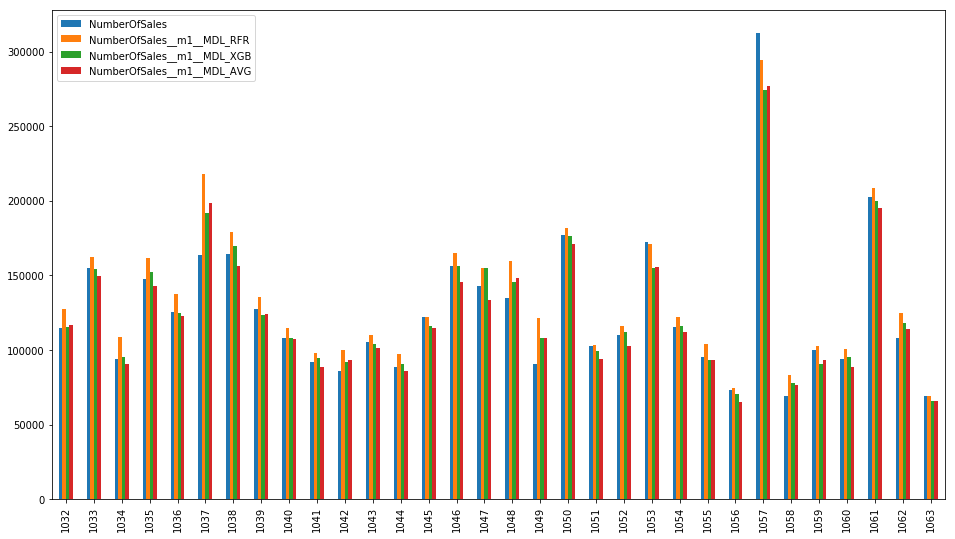

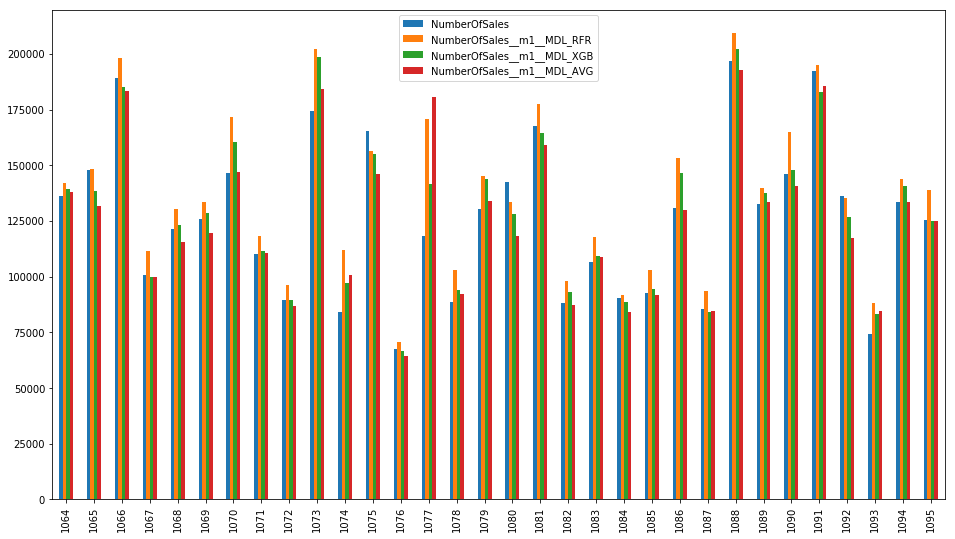

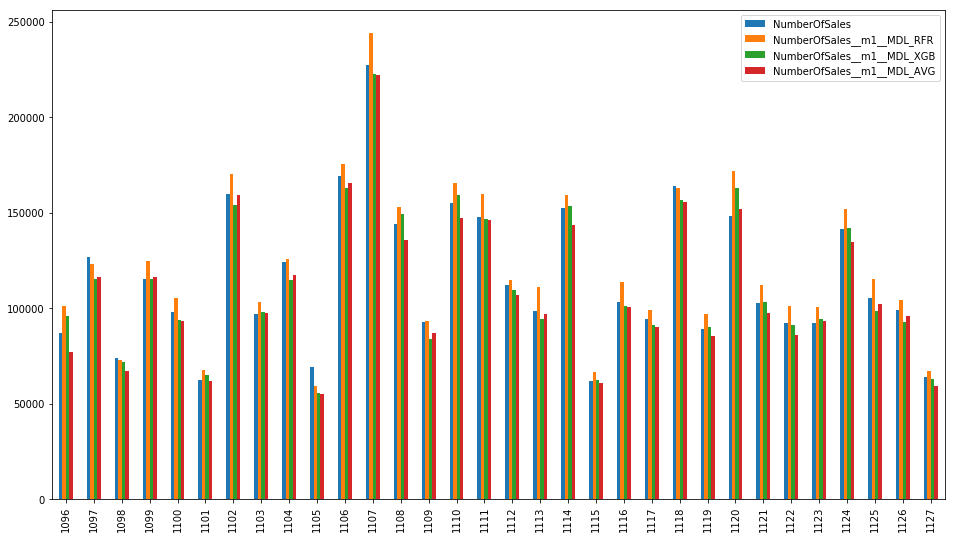

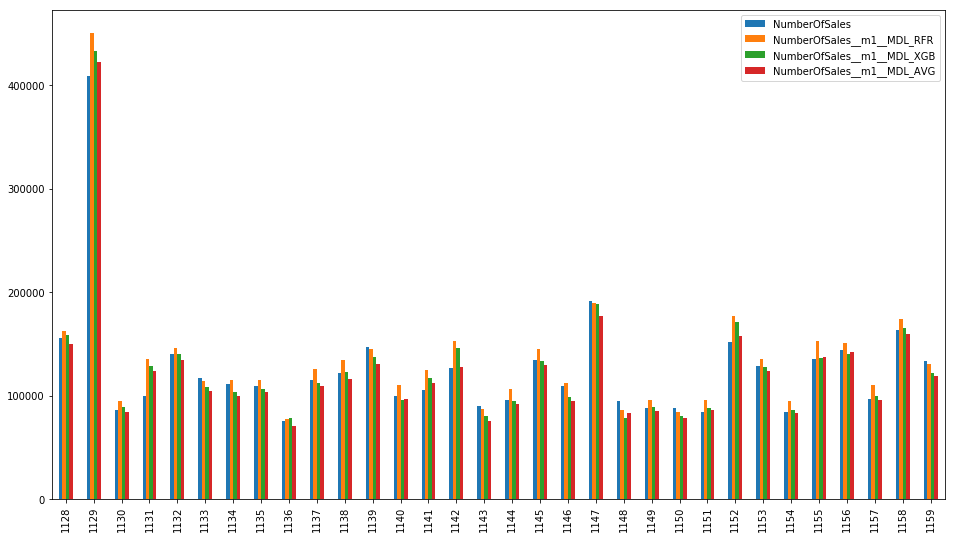

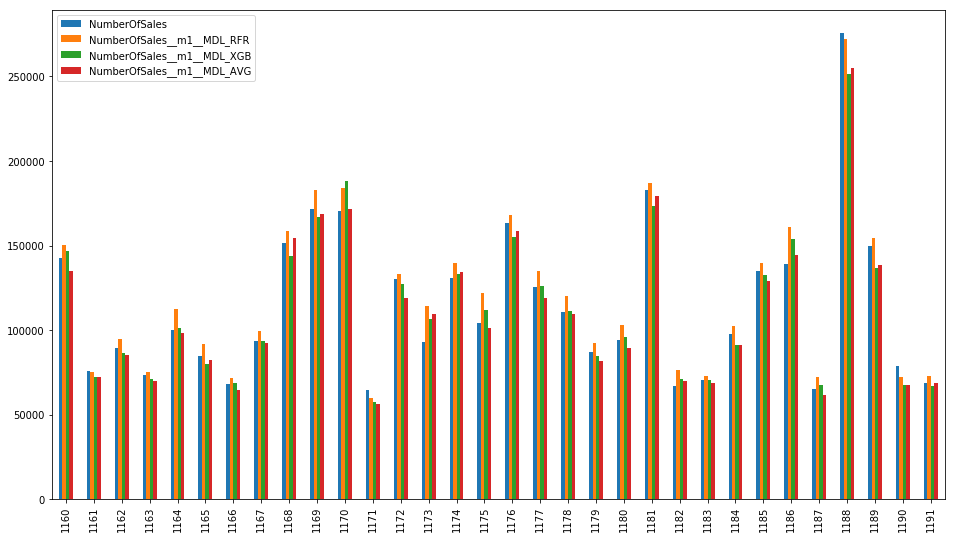

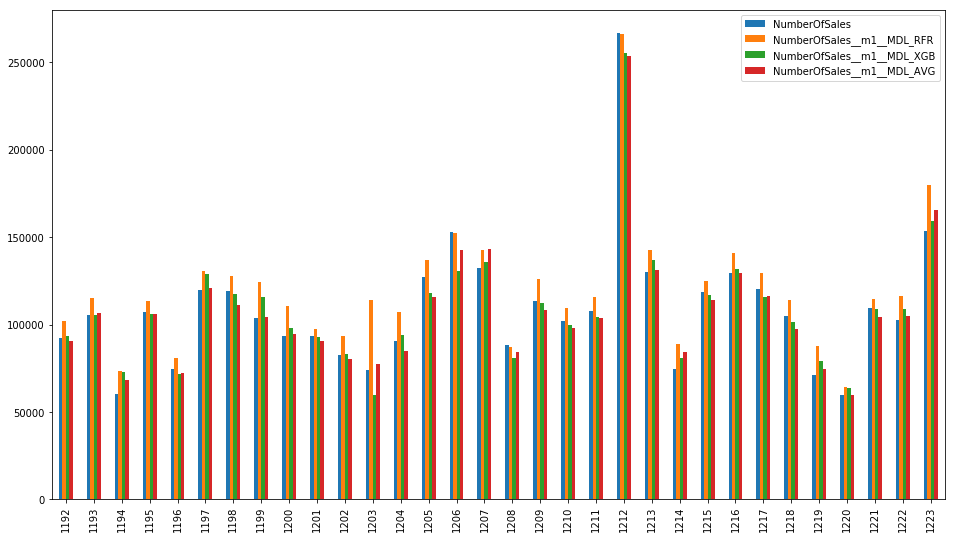

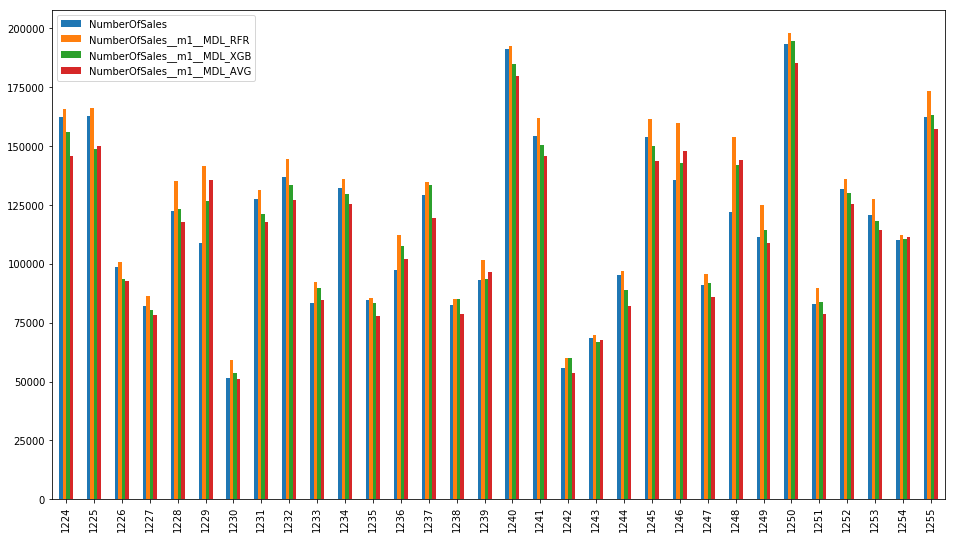

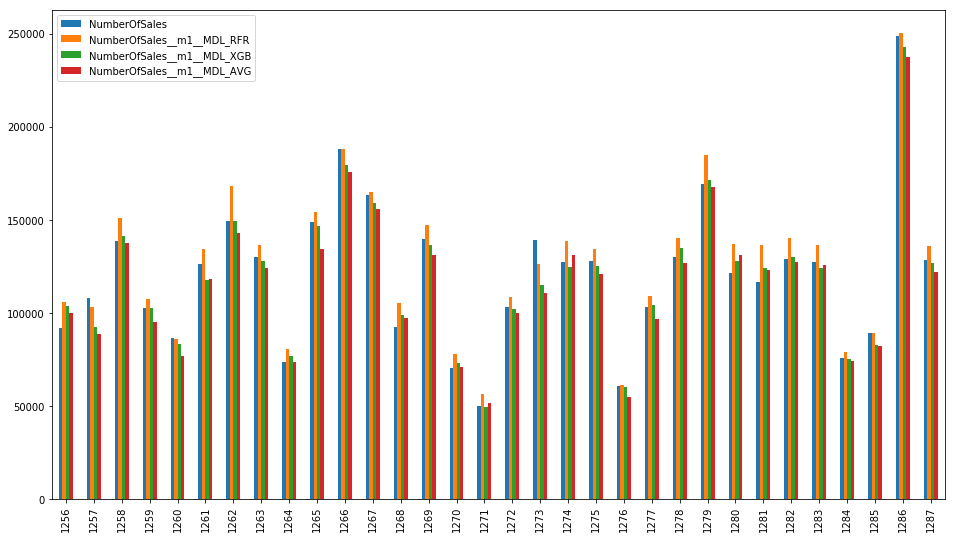

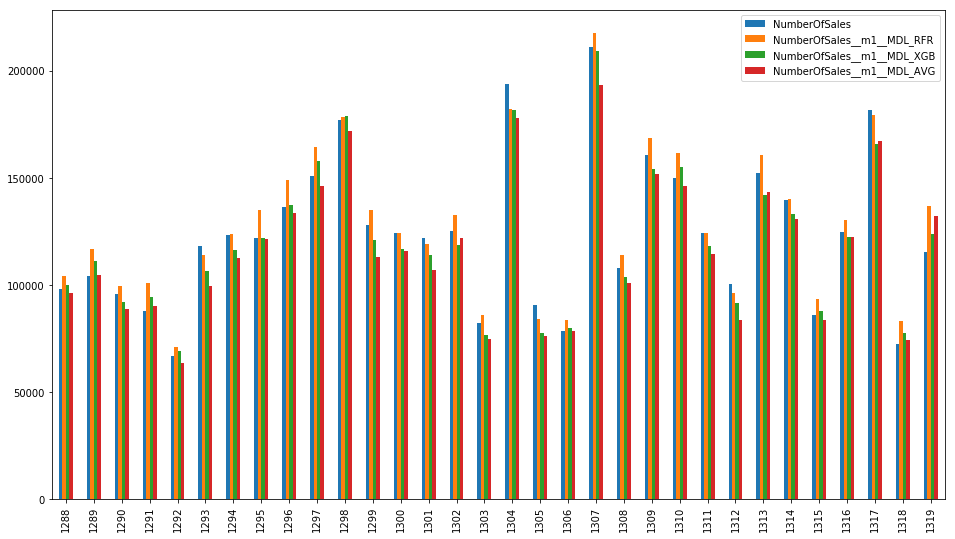

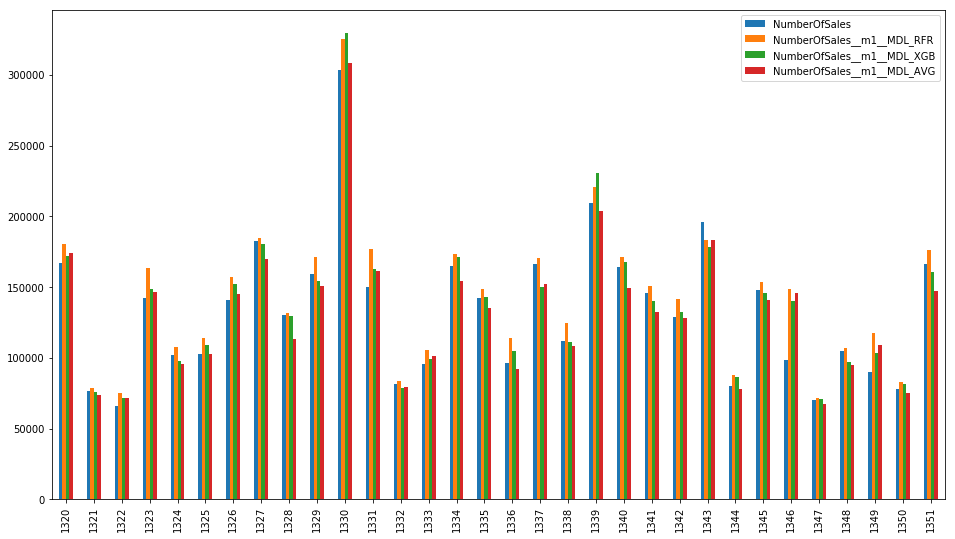

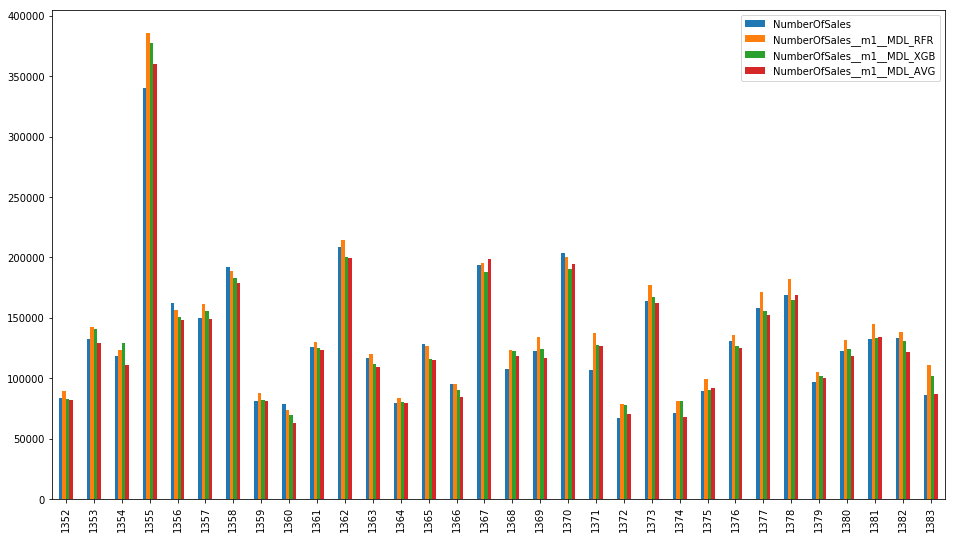

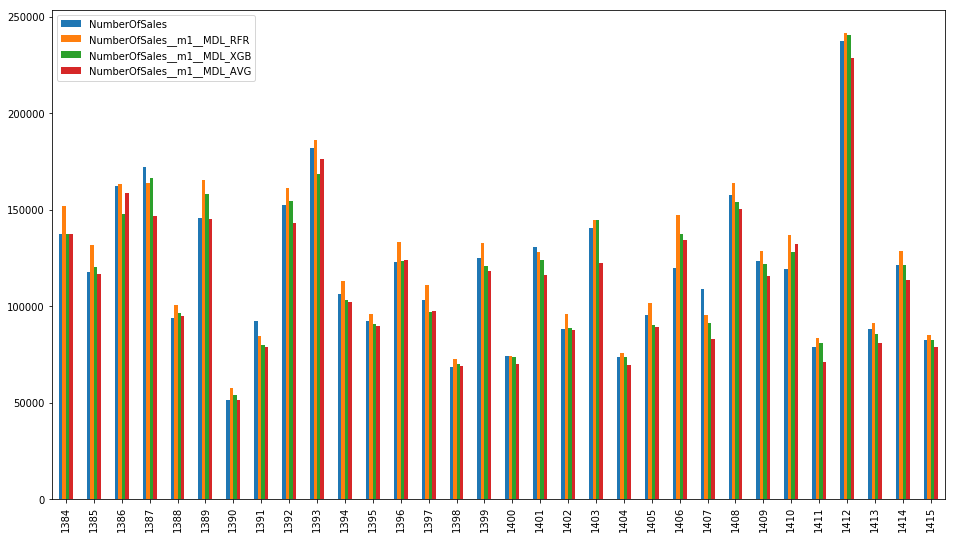

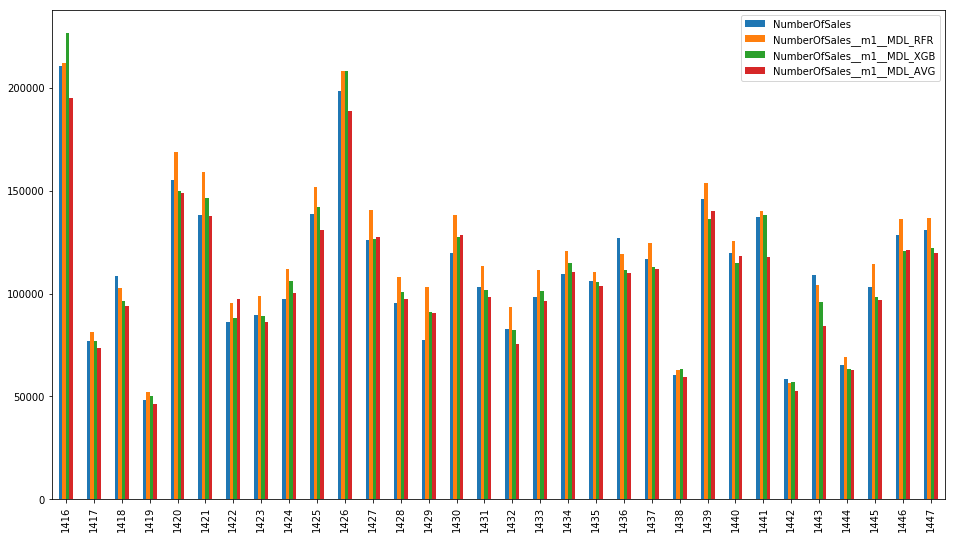

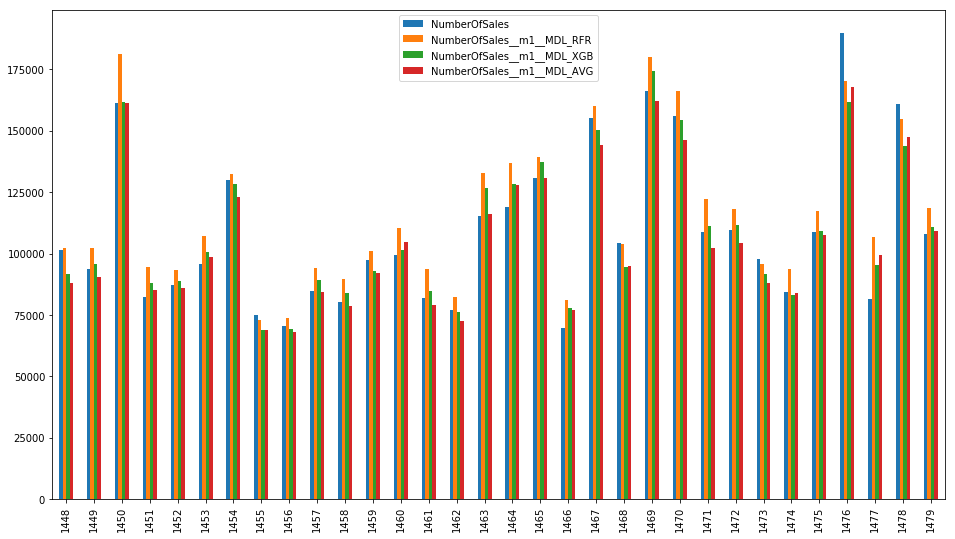

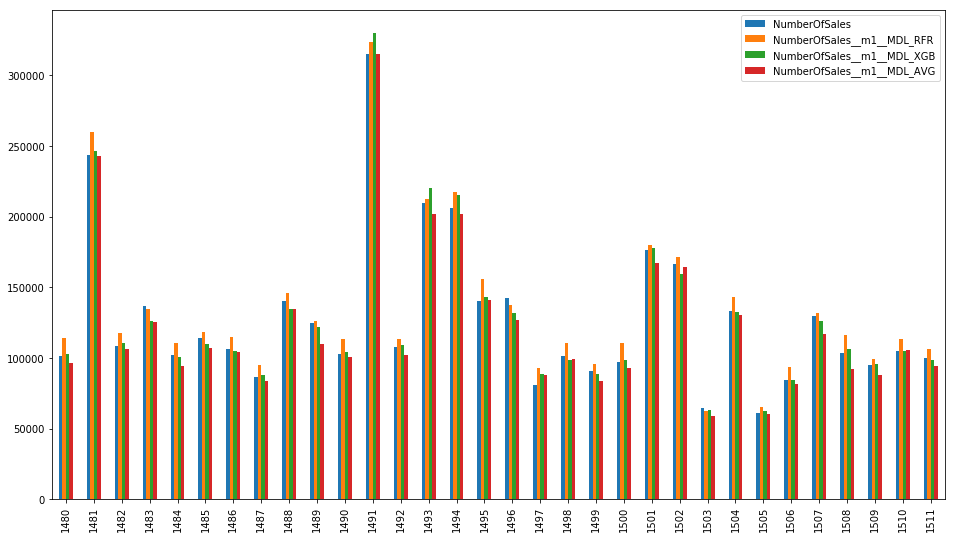

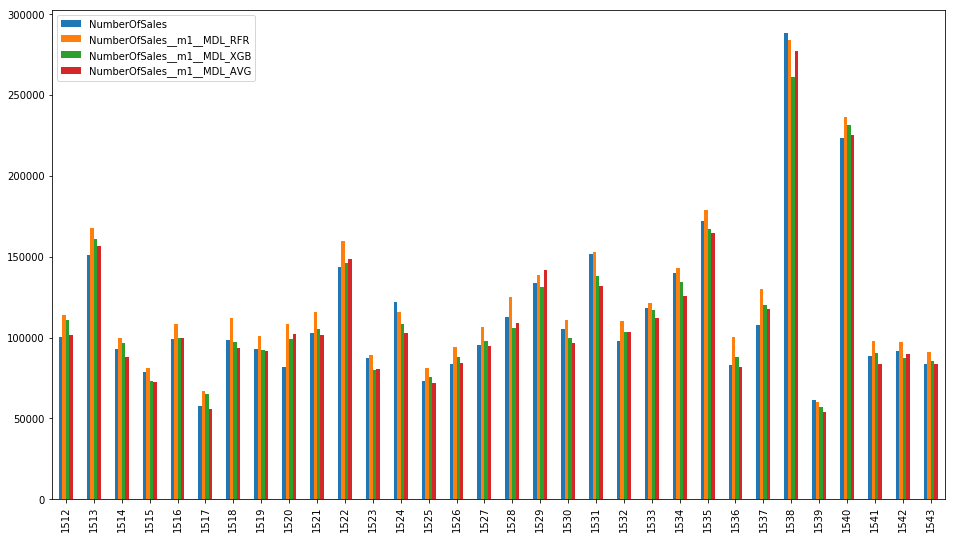

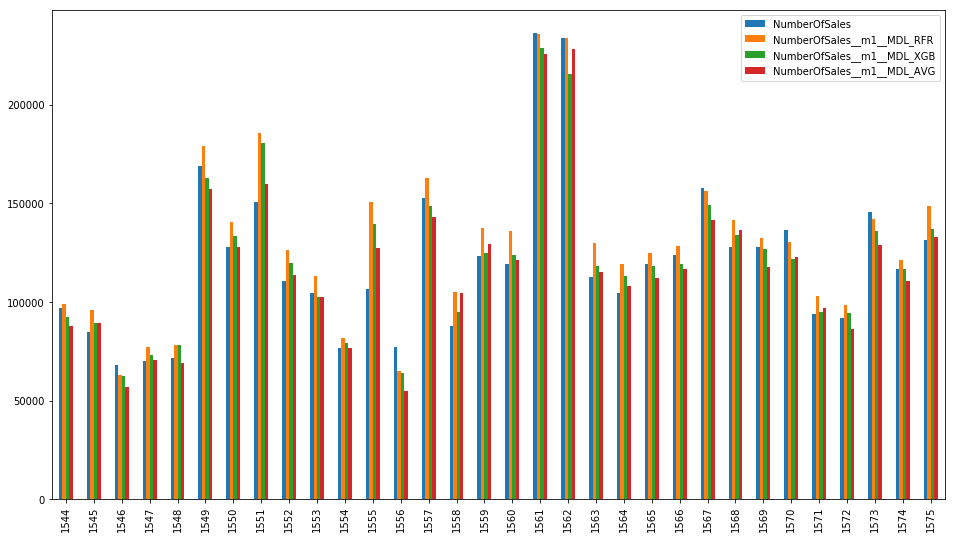

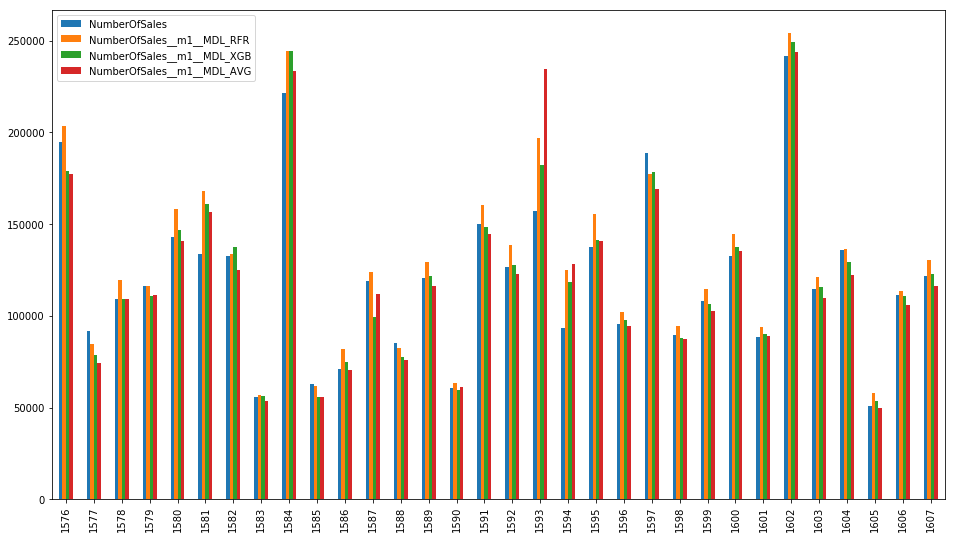

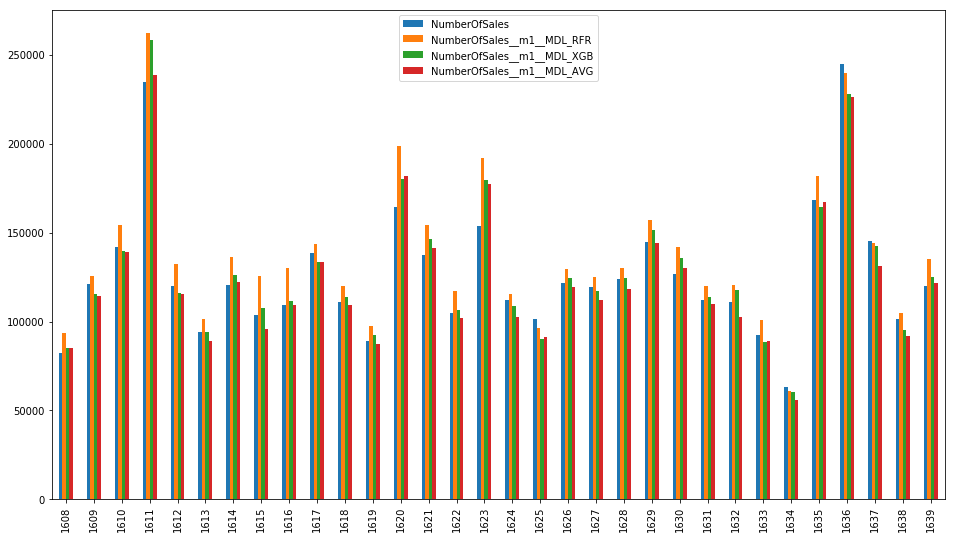

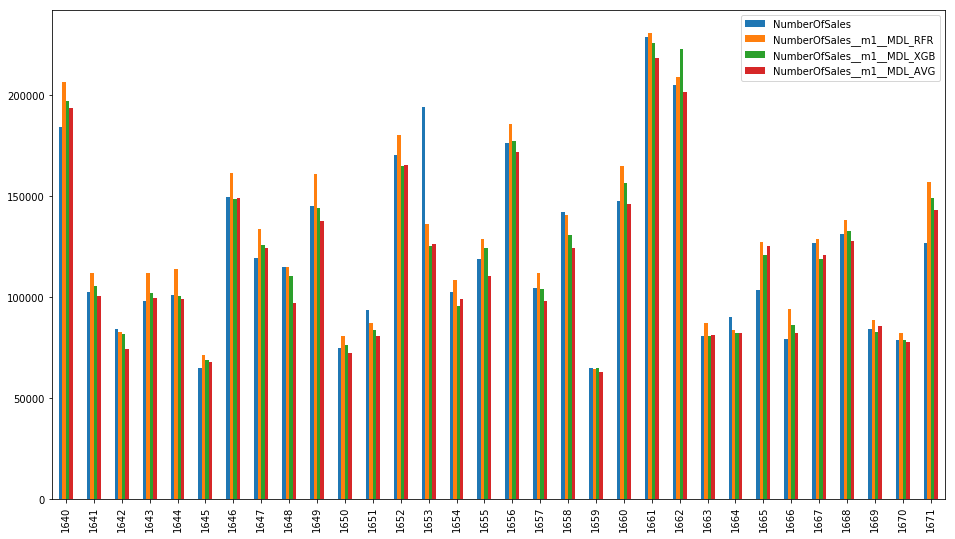

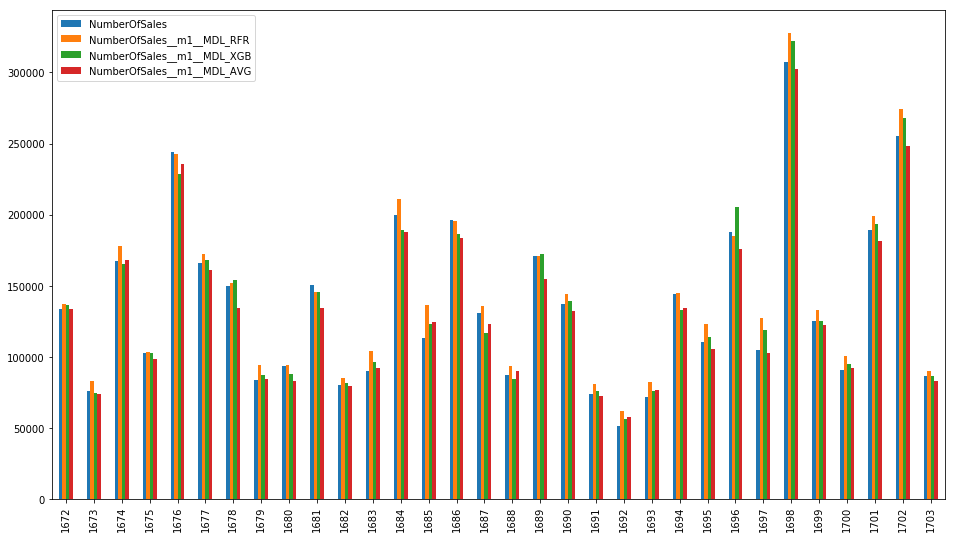

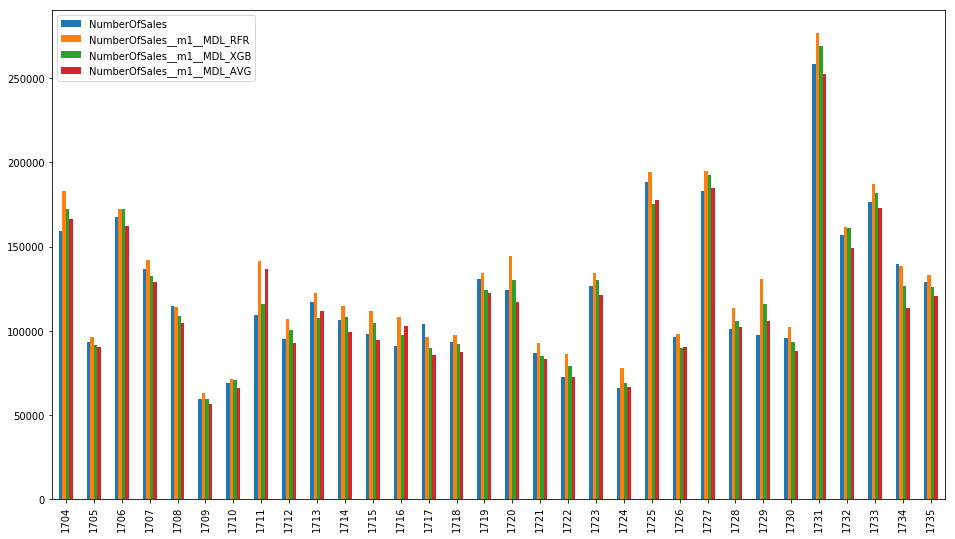

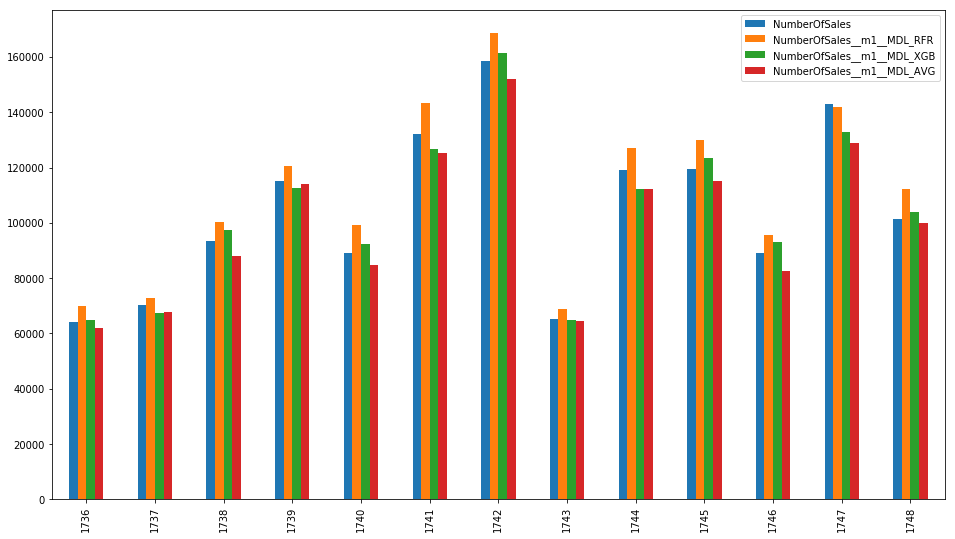

In [11]:
plot_comparison_bar_plots(df_plots, month=0, n=23)  # to print them all
#plot_comparison_bar_plots(df_plots, month=0, n=23, first=10, last=15) # just print one

## SECOND MONTH: Comparison bar plots of models' predictions

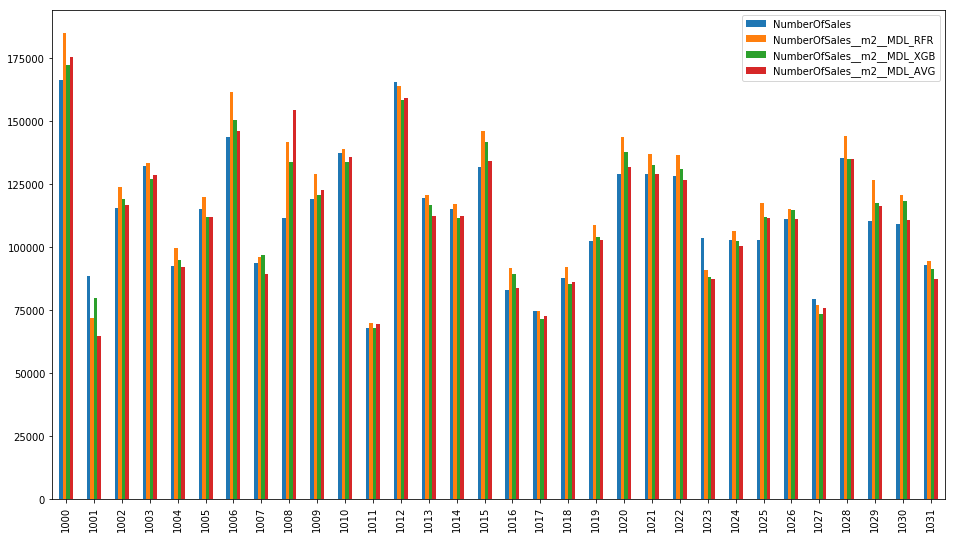

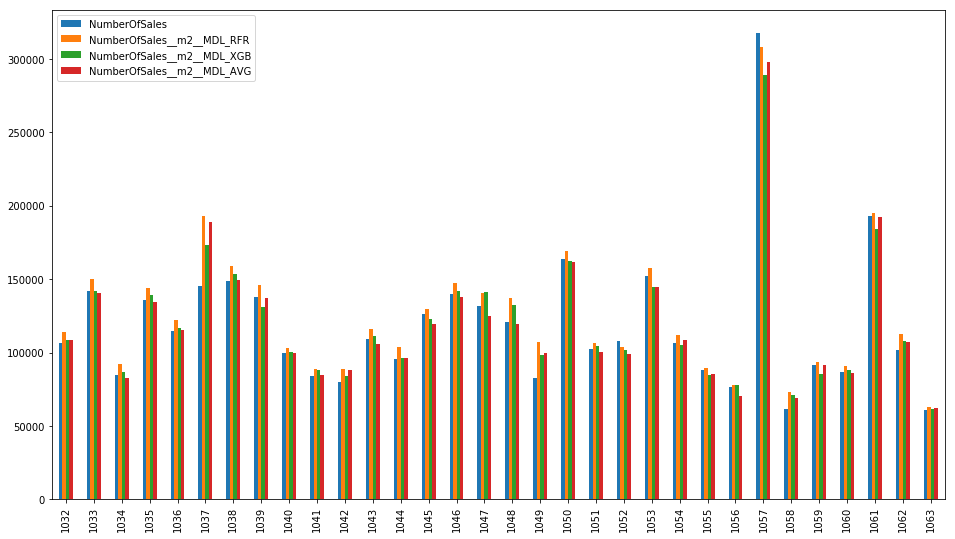

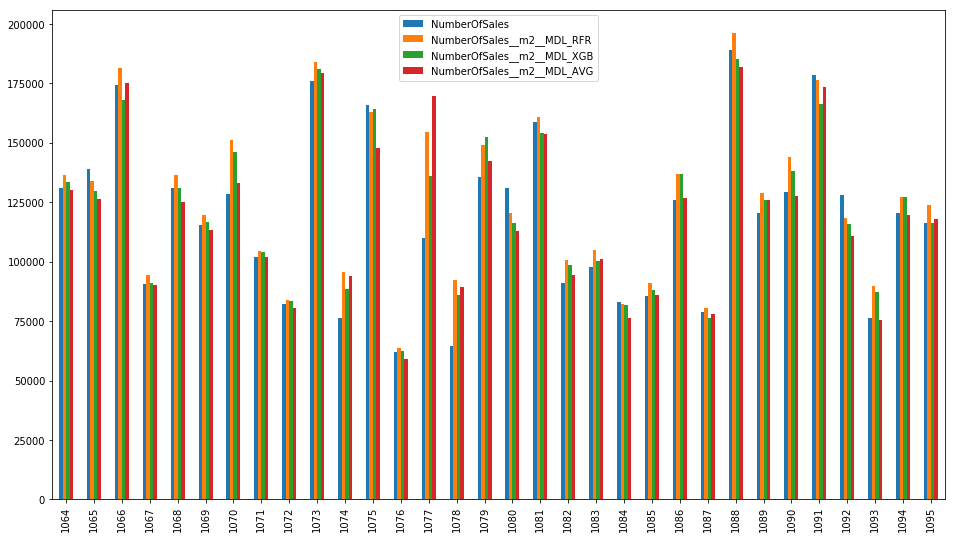

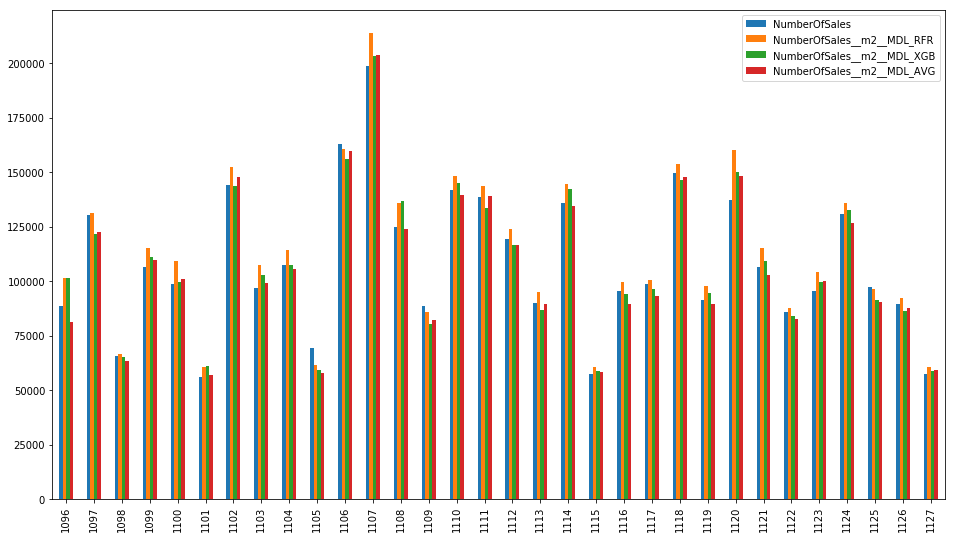

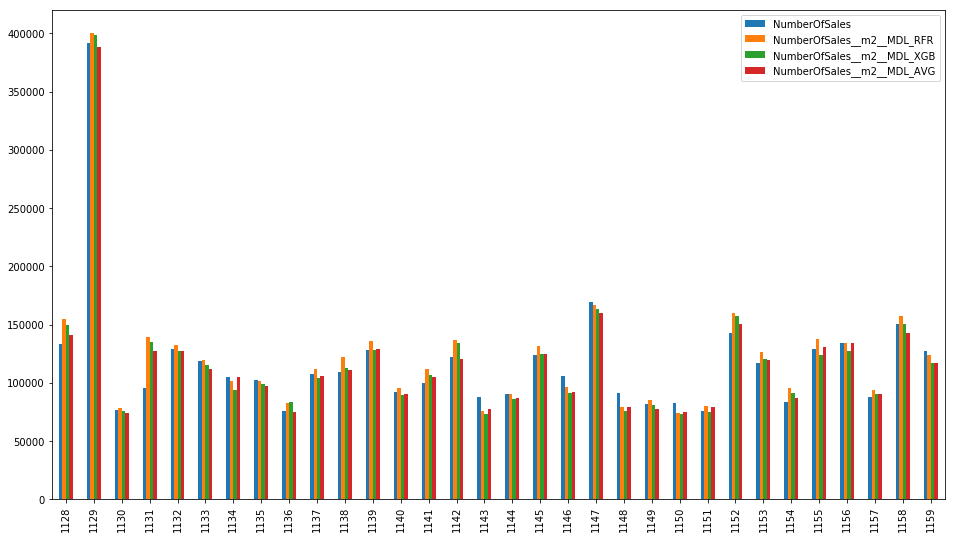

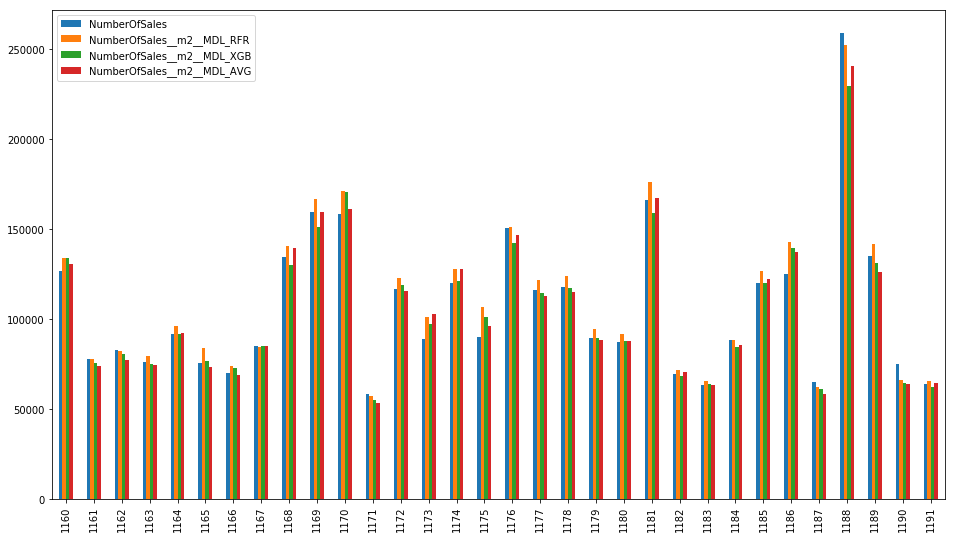

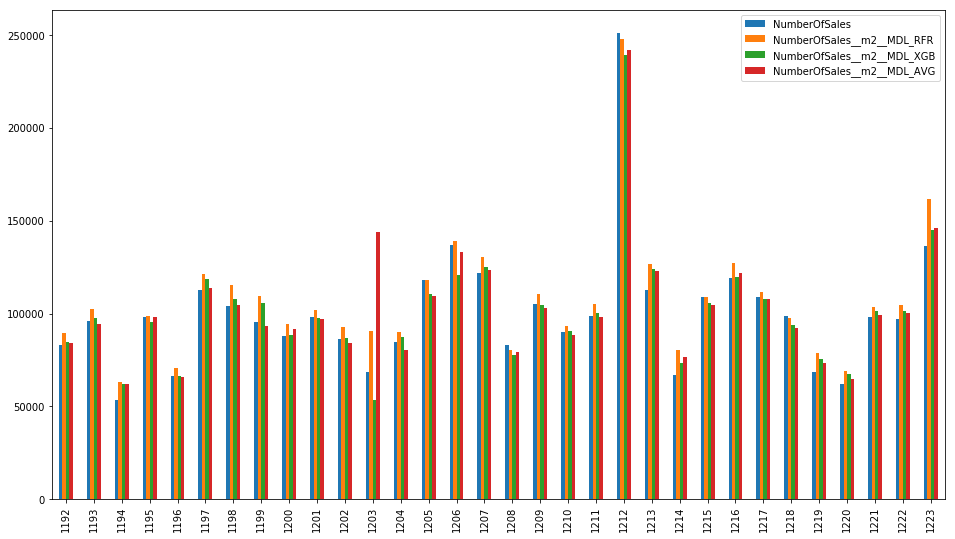

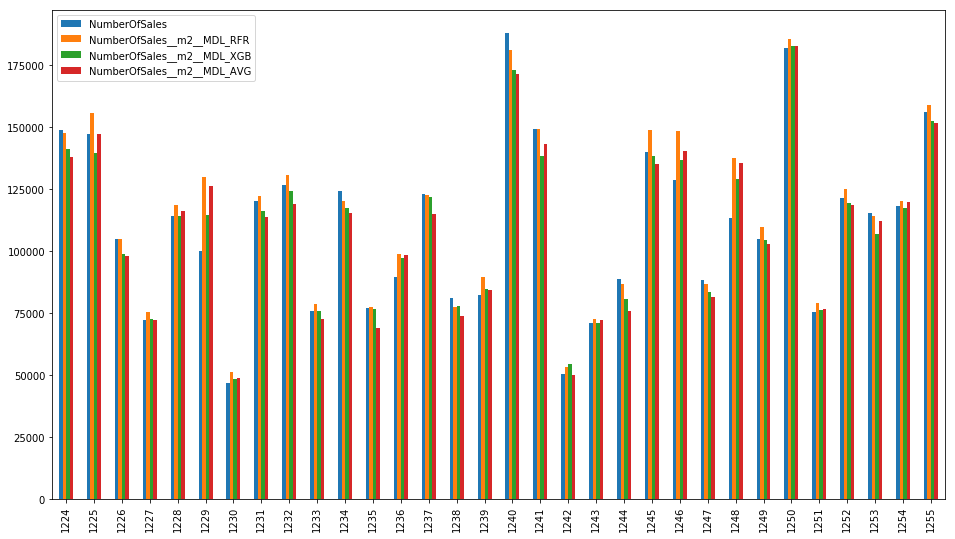

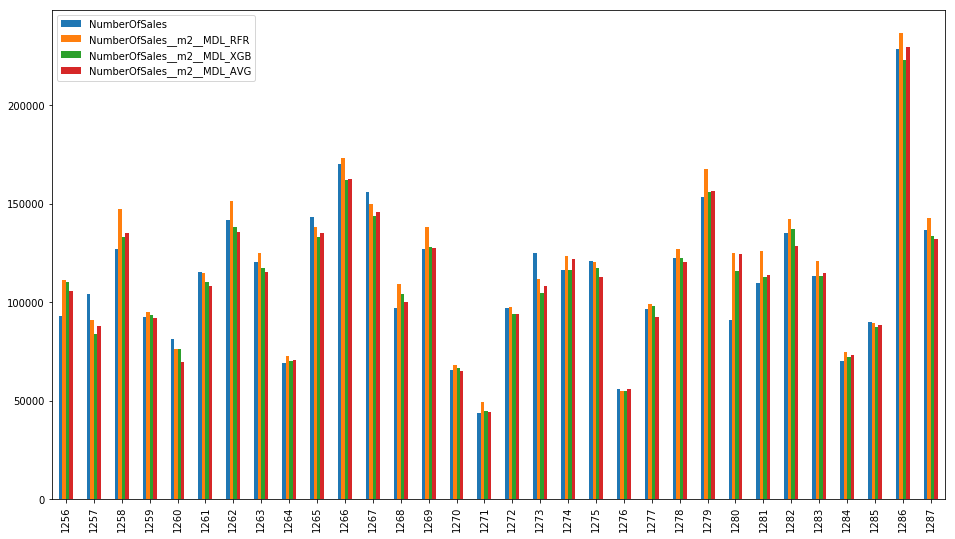

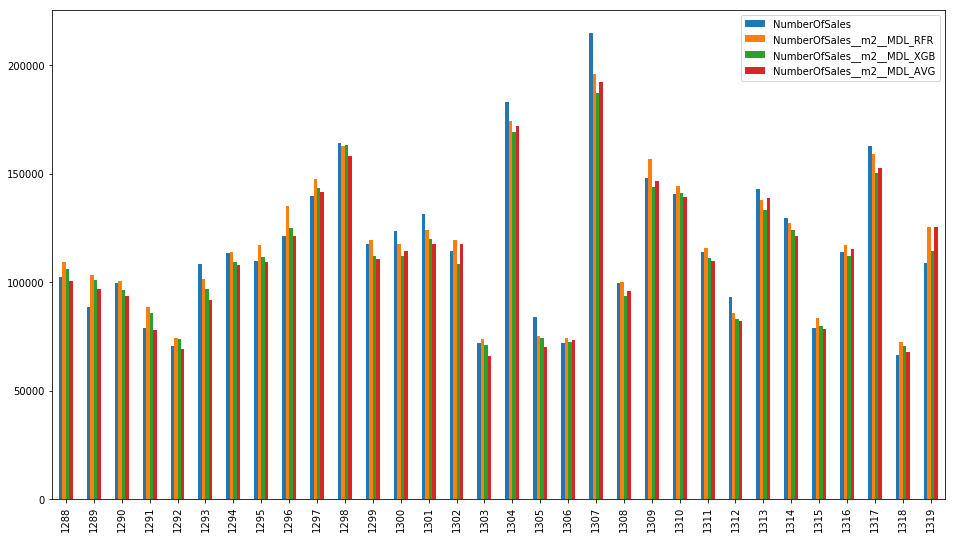

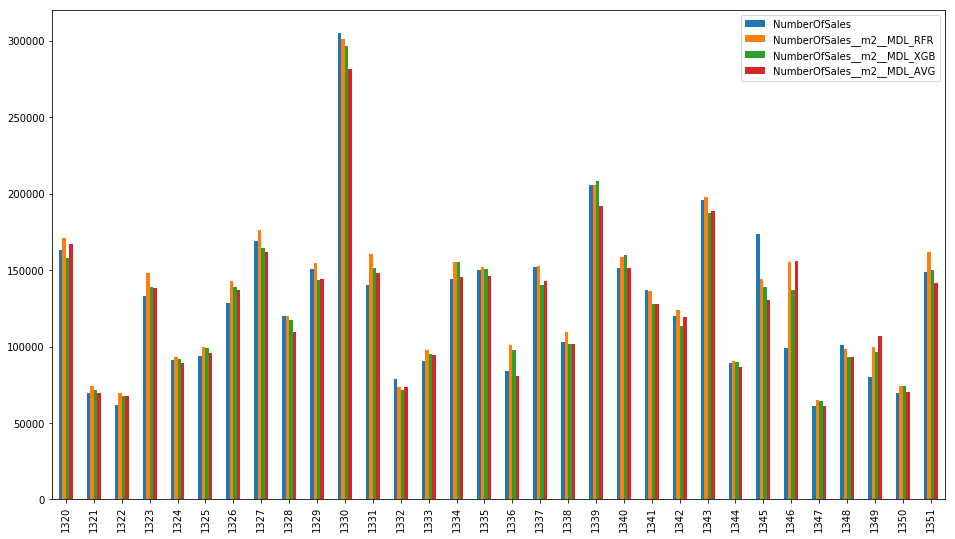

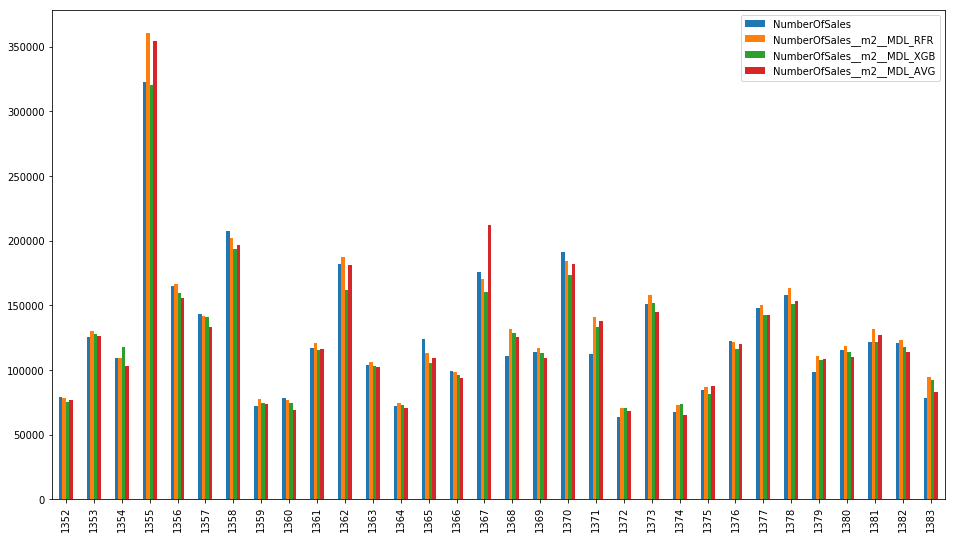

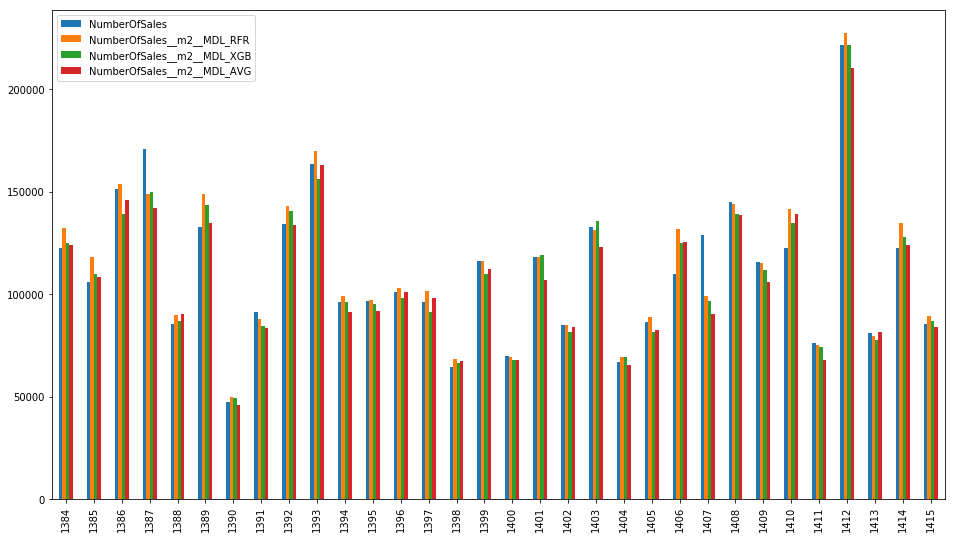

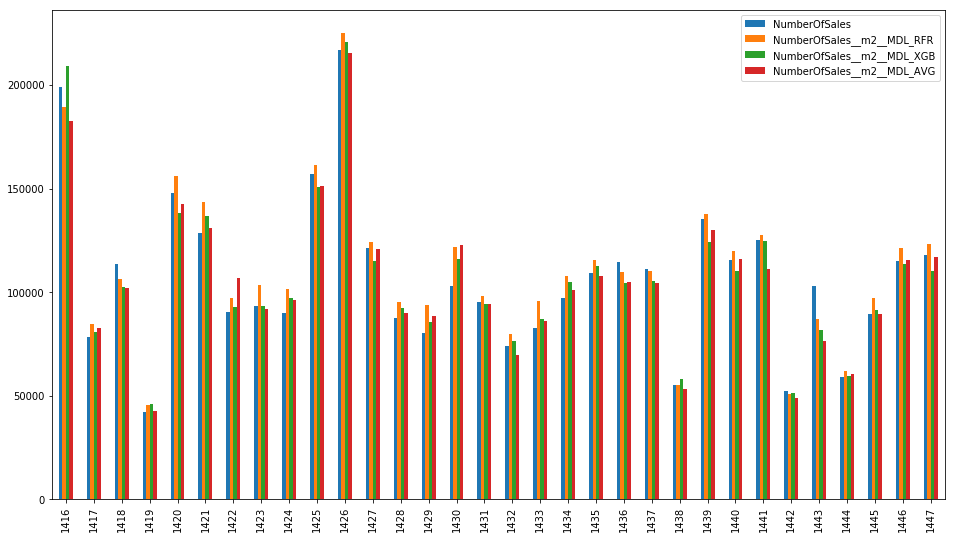

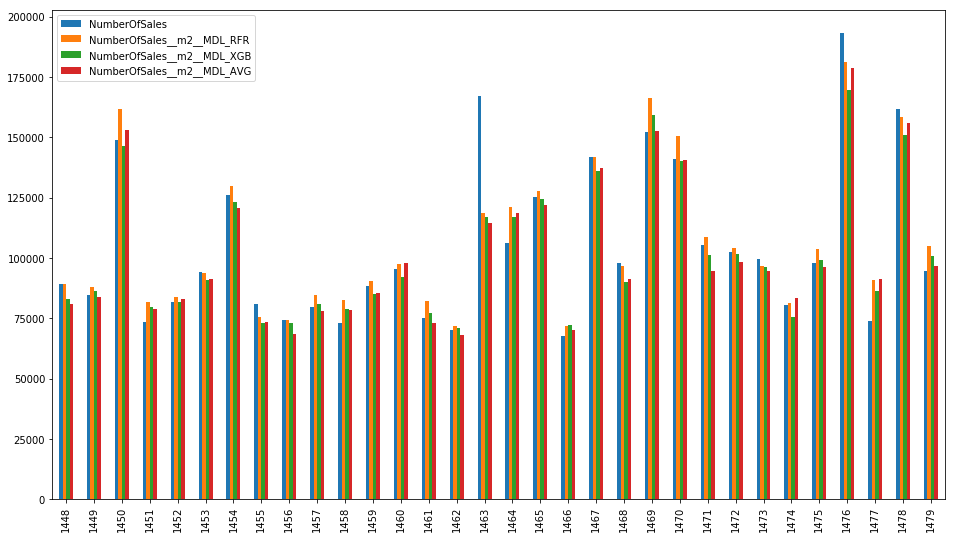

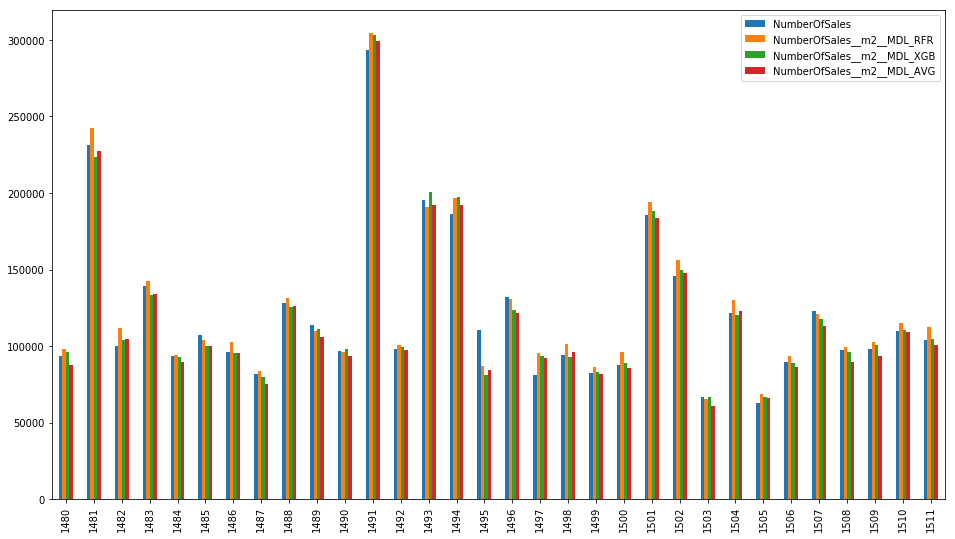

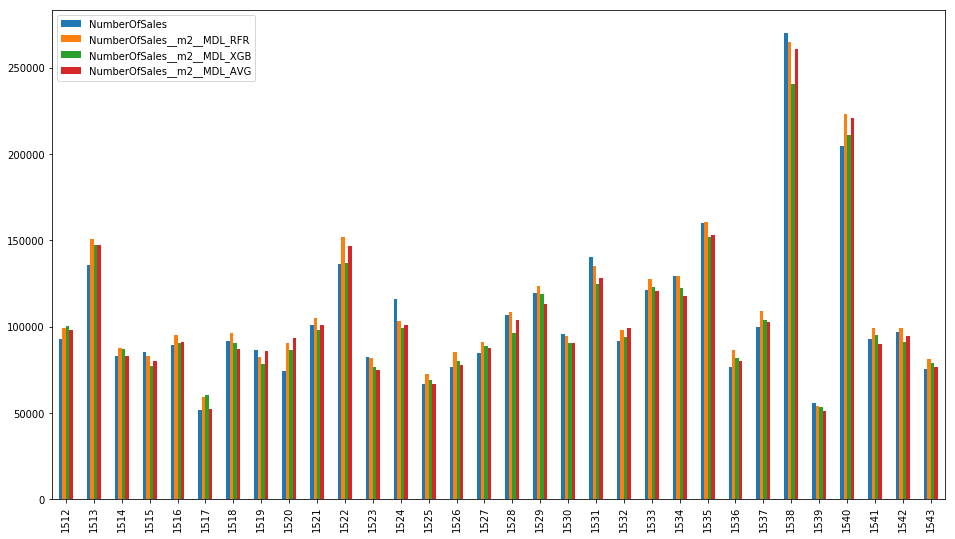

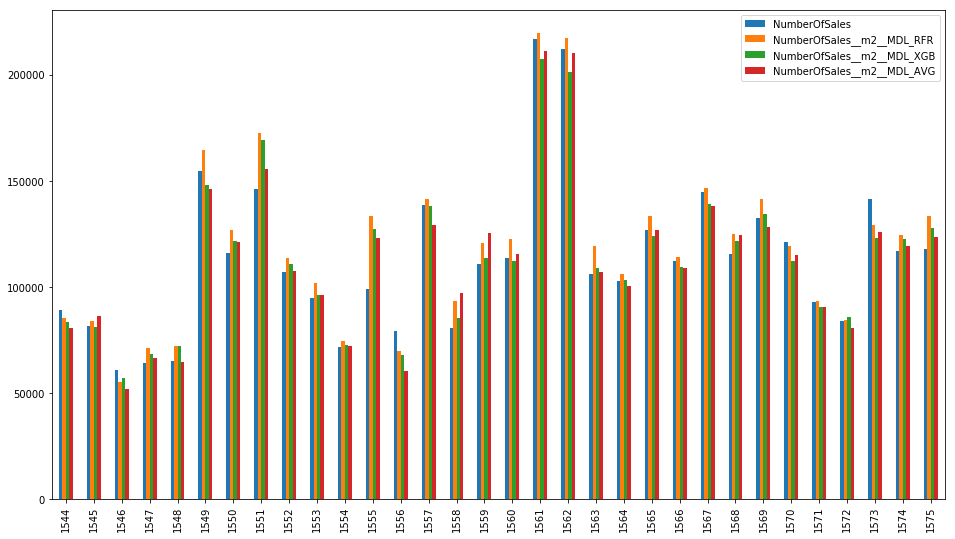

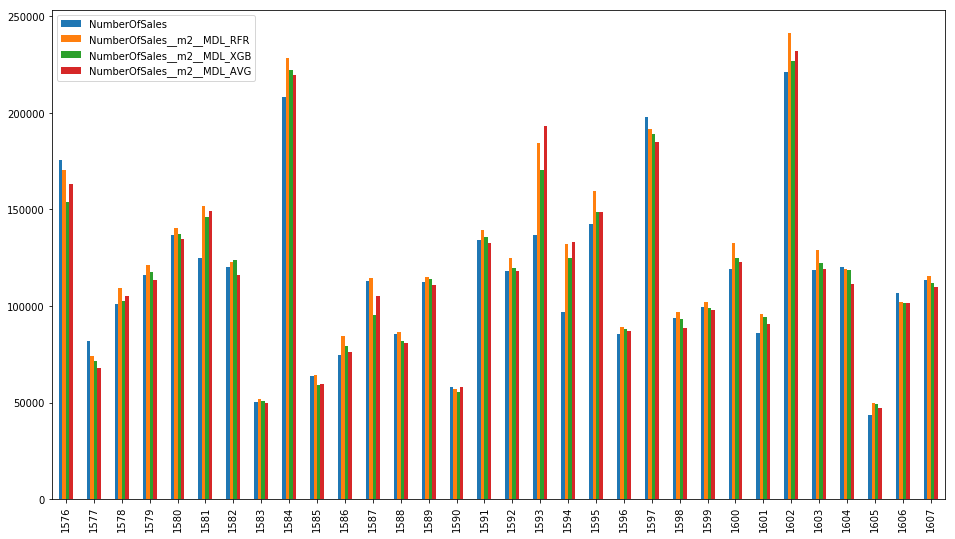

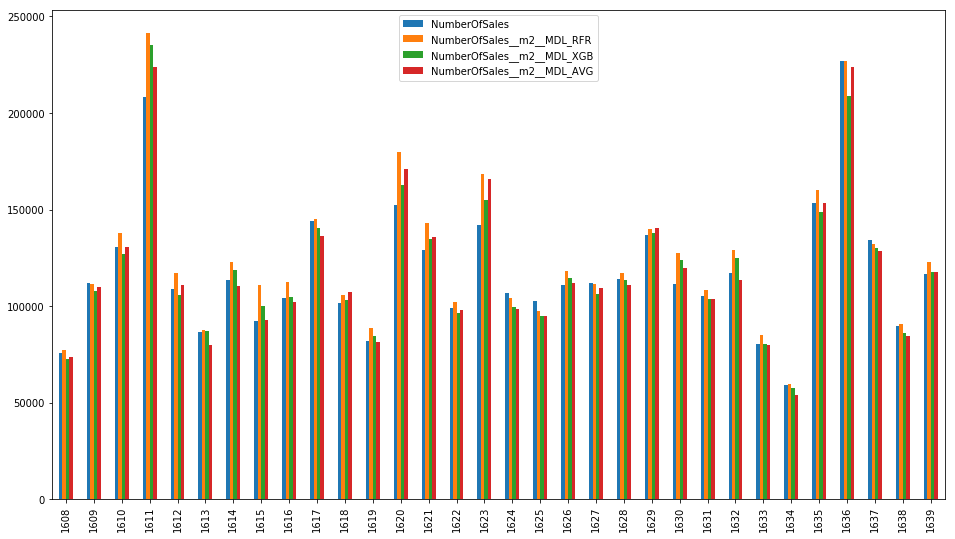

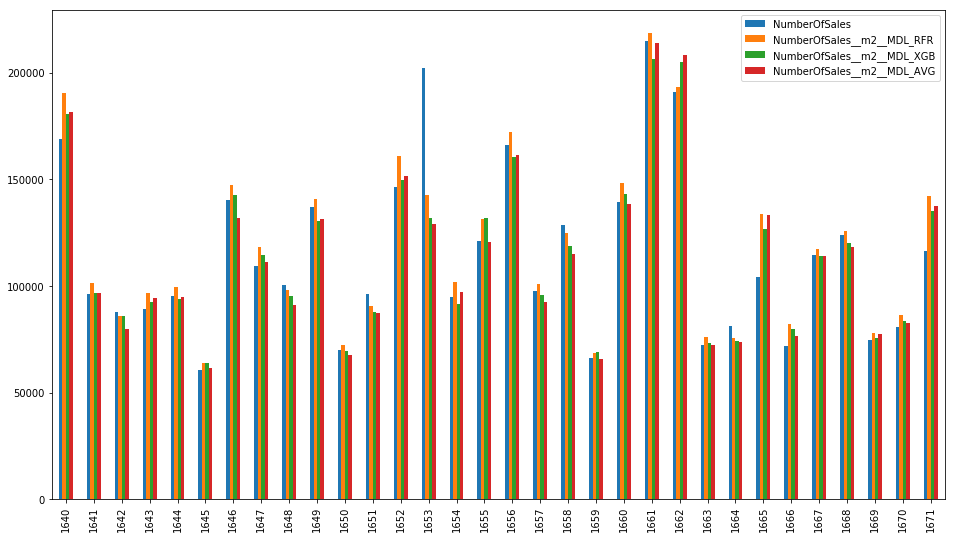

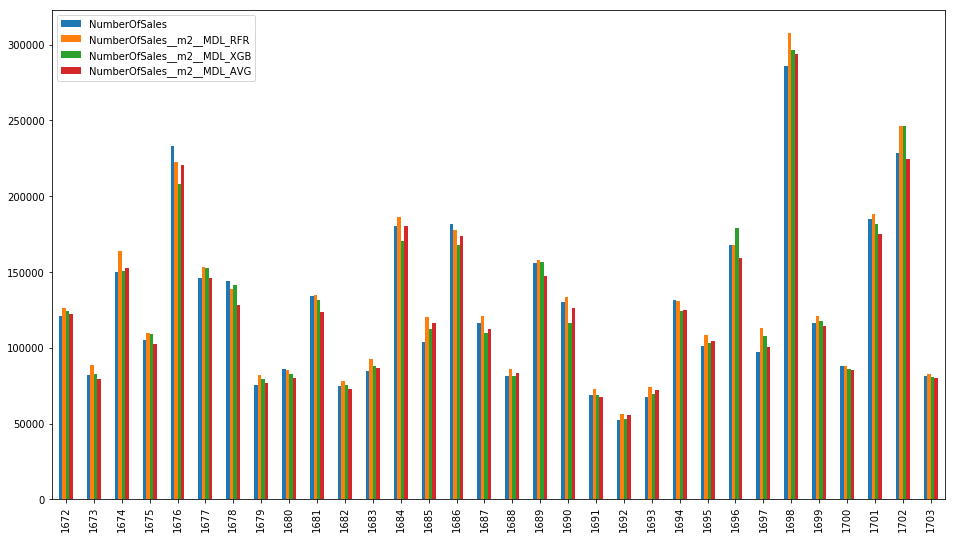

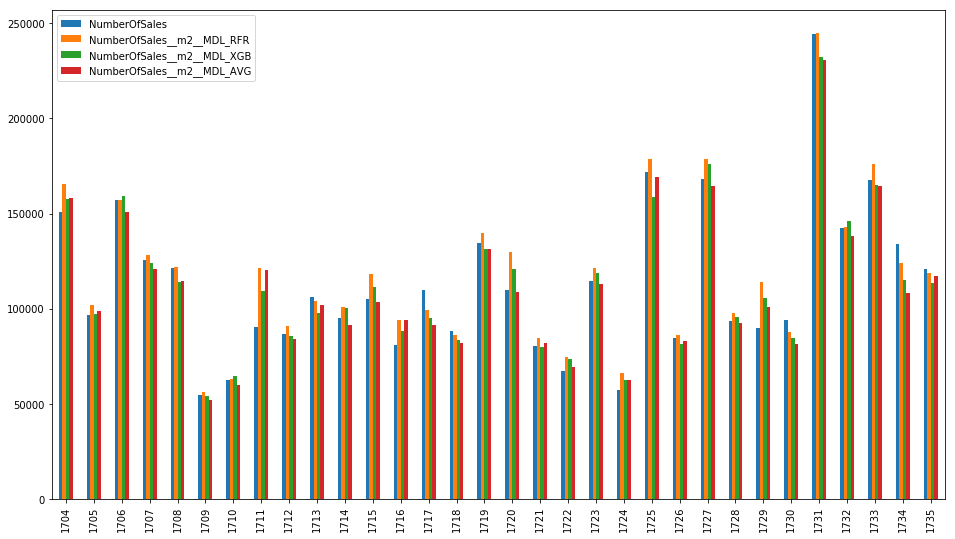

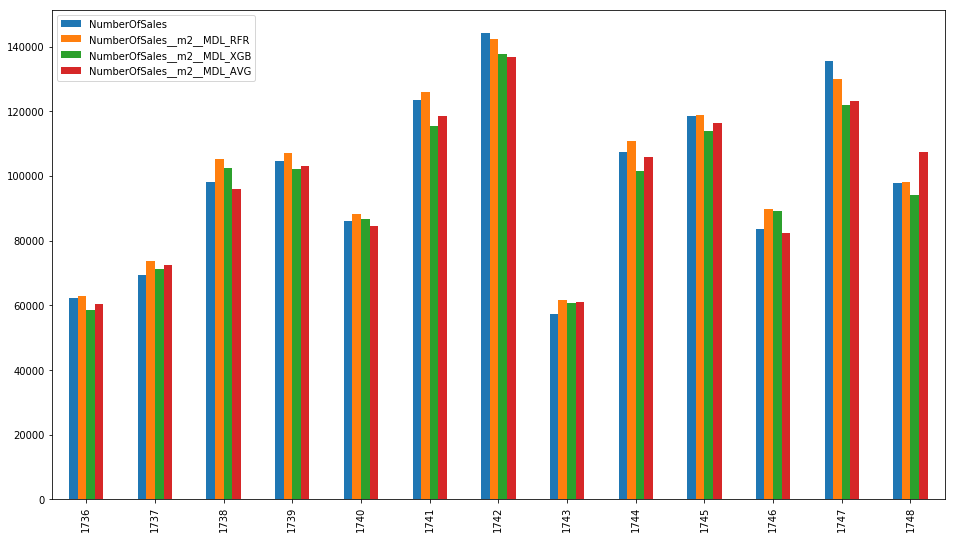

In [12]:
plot_comparison_bar_plots(df_plots, month=1, n=23)  # to print them all
#plot_comparison_bar_plots(df_plots, month=1, n=23, first=10, last=15) # just print one